# **Waste Material Segregation for Improving Waste Management** 

### By Indrajit Ghosal

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [1]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [2]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from glob import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras import Input
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2 
from sklearn.metrics import classification_report 
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import tensorflow as tf
import os
import zipfile

In [3]:
print(f"numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"tensorflow version: {tf.__version__}")
print(f"keras version: {keras.__version__}")
print(f"sklearn version: {sklearn.__version__}")

numpy version: 1.26.4
pandas version: 2.2.2
seaborn version: 0.13.2
tensorflow version: 2.10.0
keras version: 2.10.0
sklearn version: 1.6.1


Load the dataset.

In [4]:
# Load and unzip the dataset

zip_path = 'data.zip'
extract_to = 'data1' 
data_directory='data1/data' #Already unzipped dataset using 7zip
if not os.path.exists(extract_to) or not os.listdir(extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(" Extraction complete.")
else:
    print(" Data already extracted.")

 Data already extracted.


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [5]:
# Create a function to load the raw images
def load_images(filepath,image_size):
    img=Image.open(filepath)
    img =img.convert("RGB")
    img= img.resize(image_size)
    
    return img


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [6]:
# Get the images and their labels
image_array=[]
label_array=[]
image_size=(128,128)


for label in os.listdir(data_directory):
    label_dir = os.path.join(data_directory, label)
    for file in os.listdir(label_dir):
      file_path=os.path.join(label_dir,file)
      if os.path.isfile(file_path):
        img=load_images(file_path,image_size)
        image_array.append(img)
        label_array.append(label)


print(image_array)
print(label_array)


[<PIL.Image.Image image mode=RGB size=128x128 at 0x23C06635540>, <PIL.Image.Image image mode=RGB size=128x128 at 0x23C06634A90>, <PIL.Image.Image image mode=RGB size=128x128 at 0x23C06634E20>, <PIL.Image.Image image mode=RGB size=128x128 at 0x23C06634DC0>, <PIL.Image.Image image mode=RGB size=128x128 at 0x23C06636EF0>, <PIL.Image.Image image mode=RGB size=128x128 at 0x23C41C9DB70>, <PIL.Image.Image image mode=RGB size=128x128 at 0x23C41C9DBA0>, <PIL.Image.Image image mode=RGB size=128x128 at 0x23C41C9DA80>, <PIL.Image.Image image mode=RGB size=128x128 at 0x23C41C9D720>, <PIL.Image.Image image mode=RGB size=128x128 at 0x23C41C9DBD0>, <PIL.Image.Image image mode=RGB size=128x128 at 0x23C41C9DC00>, <PIL.Image.Image image mode=RGB size=128x128 at 0x23C41C9DC30>, <PIL.Image.Image image mode=RGB size=128x128 at 0x23C41C9DC60>, <PIL.Image.Image image mode=RGB size=128x128 at 0x23C41C9DCC0>, <PIL.Image.Image image mode=RGB size=128x128 at 0x23C41C9DC90>, <PIL.Image.Image image mode=RGB size=12

Perform any operations, if needed, on the images and labels to get them into the desired format.

In [7]:
### Checking the loaded images and labels
X,y=image_array,label_array
X = np.array(X)
y = np.array(y).flatten()

print(f"Total images: {X.shape[0]}, Image shape: {X.shape[1:]}")
print(f"Sample labels: {np.unique(y)}")

Total images: 7625, Image shape: (128, 128, 3)
Sample labels: ['Cardboard' 'Food_Waste' 'Glass' 'Metal' 'Other' 'Paper' 'Plastic']


### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

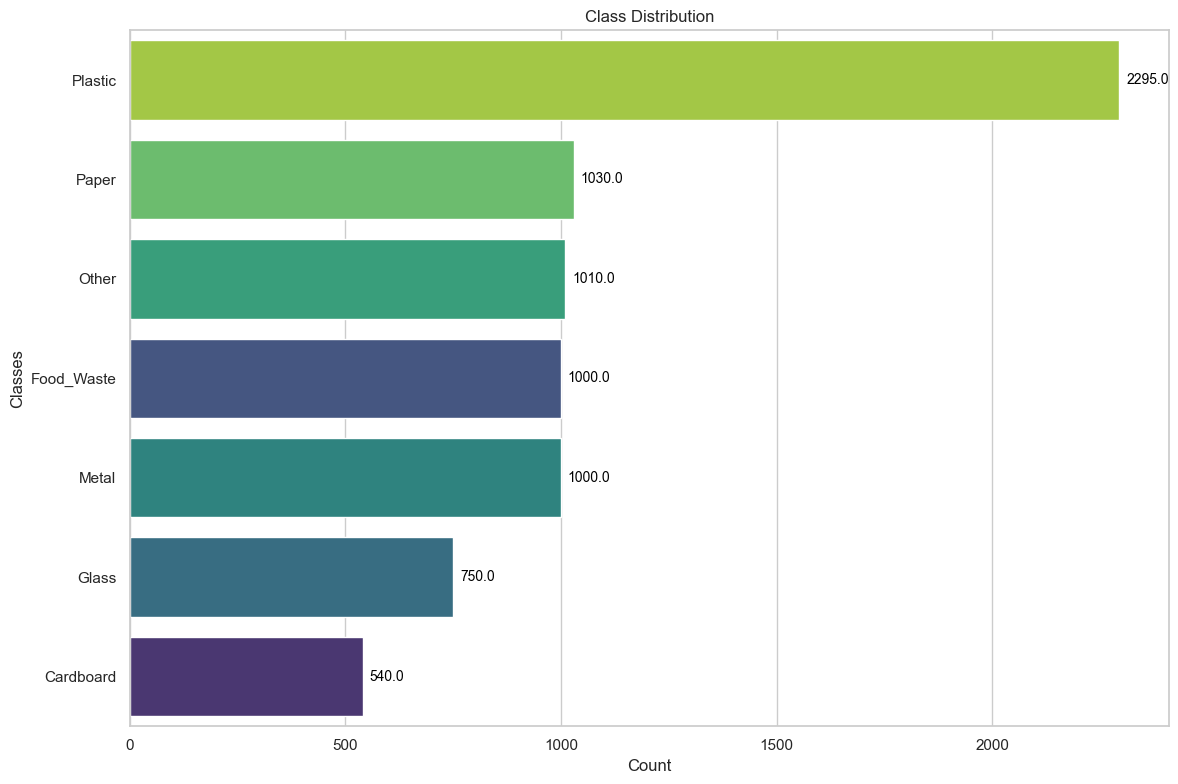

In [8]:
# Visualise Data Distribution
#Create function for a bar plot to display the class distribution and add labels on top of bars
def plot_class_distribution(labels):
    labels = pd.Series(labels)  # Ensure labels is a Series
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 8))
    pl = sns.countplot(y=labels, hue=labels, order=labels.value_counts().index, palette="viridis", legend=False)

    for p in pl.patches:
        pl.annotate(f'{p.get_width()}', 
                    (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='left', va='center', fontsize=10, color='black', 
                    xytext=(5, 0), textcoords='offset points')

    plt.title("Class Distribution")
    plt.xlabel("Count")
    plt.ylabel("Classes")
    plt.tight_layout()
    plt.show()
# Plot the class distribution
plot_class_distribution(pd.Series(y))   


#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

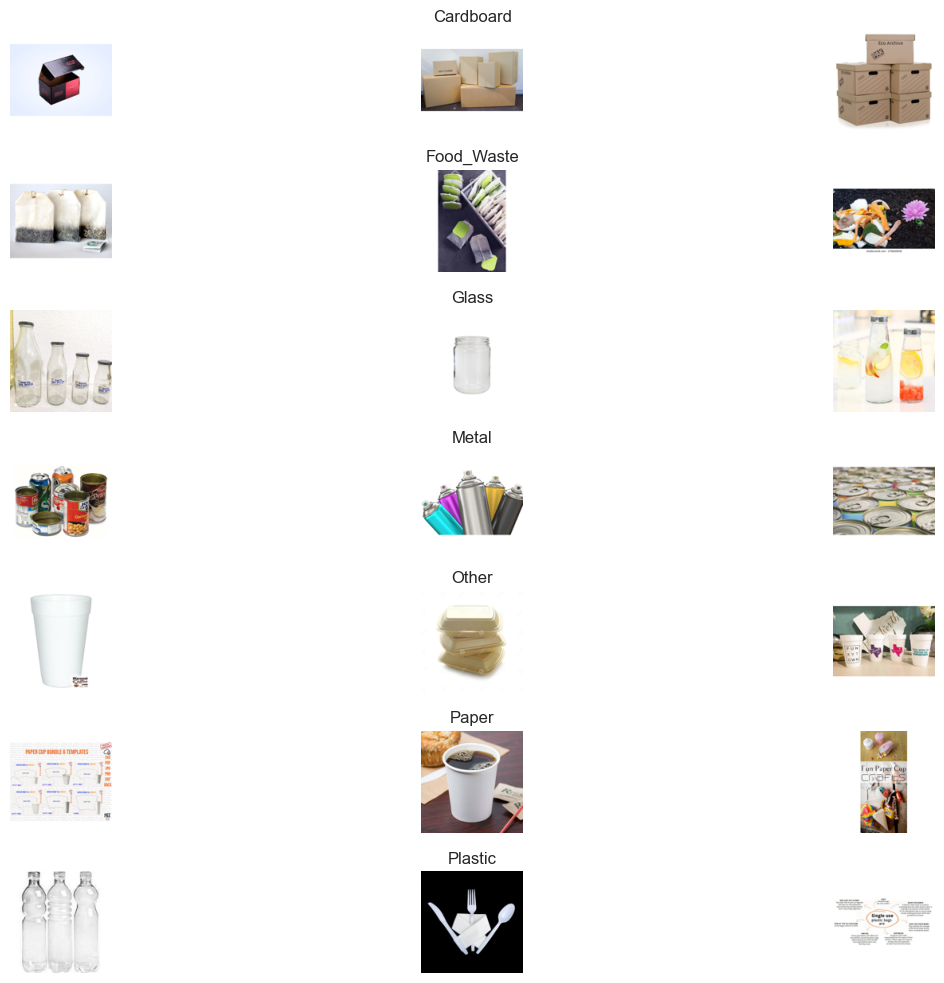

In [9]:
# Visualise Sample Images (across different labels)
def ViewSampleImages(X, y, class_names, samples_per_class=3):
    plt.figure(figsize=(15, 10))
    for idx, class_name in enumerate(class_names):
        class_indices = np.where(y == class_name)[0]
        selected_indices = np.random.choice(class_indices, samples_per_class, replace=False)
        for i, img_idx in enumerate(selected_indices):
            plt_idx = idx * samples_per_class + i + 1
            plt.subplot(len(class_names), samples_per_class, plt_idx)
            plt.imshow(X[img_idx])
            plt.axis('off')
            if i == 1:
                plt.title(class_name)
    plt.tight_layout()
    plt.show()

class_names = sorted(np.unique(label_array))
ViewSampleImages(X, y, class_names)


#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [10]:
# Find the smallest and largest image dimensions from the data set
min_width=0
min_height=0
max_width=0
max_height=0
for image in image_array:
    width, height = image.size
    min_width = min(min_width, width)
    min_height = min(min_height, height)
    max_width = max(max_width, width)
    max_height = max(max_height, height)

print(f"Min dimensions: ({min_width}, {min_height})")
print(f"Max dimensions: ({max_width}, {max_height})")


Min dimensions: (0, 0)
Max dimensions: (128, 128)


In [11]:
# Resize the image dimensions


## Not applicable as we have already resized the images to (128, 128) during loading


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [12]:
# Encode the labels suitably
label_encoder = LabelEncoder()
encoded_labels= label_encoder.fit_transform(y)
y_categorical = to_categorical(encoded_labels)

# Mapping class names to encoded labels
for class_name, label in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{class_name} → {label}")

Cardboard → 0
Food_Waste → 1
Glass → 2
Metal → 3
Other → 4
Paper → 5
Plastic → 6


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [13]:
# Assign specified parts of the dataset to train and validation sets
X_train, X_val,y_train, y_val,= train_test_split(image_array, y_categorical, test_size=0.3, random_state=42, stratify=encoded_labels)

X_train = np.array([np.array(img) for img in X_train])
X_val = np.array(X_val)
X_train=X_train.astype('float32')/255.0
X_val=X_val.astype('float32')/255.0
print("Training set size:", X_train.shape[0],X_train.shape)
print("Validation set size:", X_val.shape[0],X_val.shape)


Training set size: 5337 (5337, 128, 128, 3)
Validation set size: 2288 (2288, 128, 128, 3)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [14]:
# Build and compile the model
model = Sequential()

model.add(Input(shape=(128, 128, 3)))  # RGB image

# Conv Block 1
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Conv Block 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Conv Block 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


# Regularization
model.add(Dropout(0.4))

# Fully connected
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(len(np.unique(encoded_labels)), activation='softmax'))


#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [15]:

# List all GPUs
tf.config.list_physical_devices('GPU')
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Set memory growth to avoid full GPU allocation
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        
        # Optional: restrict TensorFlow to a specific GPU (e.g., GPU 0)
        tf.config.set_visible_devices(gpus[0], 'GPU')
        print("GPU is set and visible.")
    except RuntimeError as e:
        print(e)
else:
    print("No GPU found. TensorFlow is using CPU.")

Physical devices cannot be modified after being initialized


In [16]:
%%time
# Training

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),  # ← Higher LR for scratch
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Callbacks to avoid overfitting and help convergence
callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1),
    ModelCheckpoint('best_model.keras', save_best_only=True)
]

model.summary()

# Fit the model
history = model.fit(
    X_train, y_train,
    epochs=100,                 
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=callbacks,
    verbose=1
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 64)       256       
 hNormalization)                                                 
                                                        

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [17]:
print(X_val.shape)  # Make sure it's 4D


(2288, 128, 128, 3)


72/72 [==============================] - 0s 4ms/step - loss: 1.1439 - accuracy: 0.6281 - precision: 0.8006 - recall: 0.4476
Validation Loss: 1.1439
Validation Accuracy: 62.81%
Precision: 80.06%
Recall: 44.76%


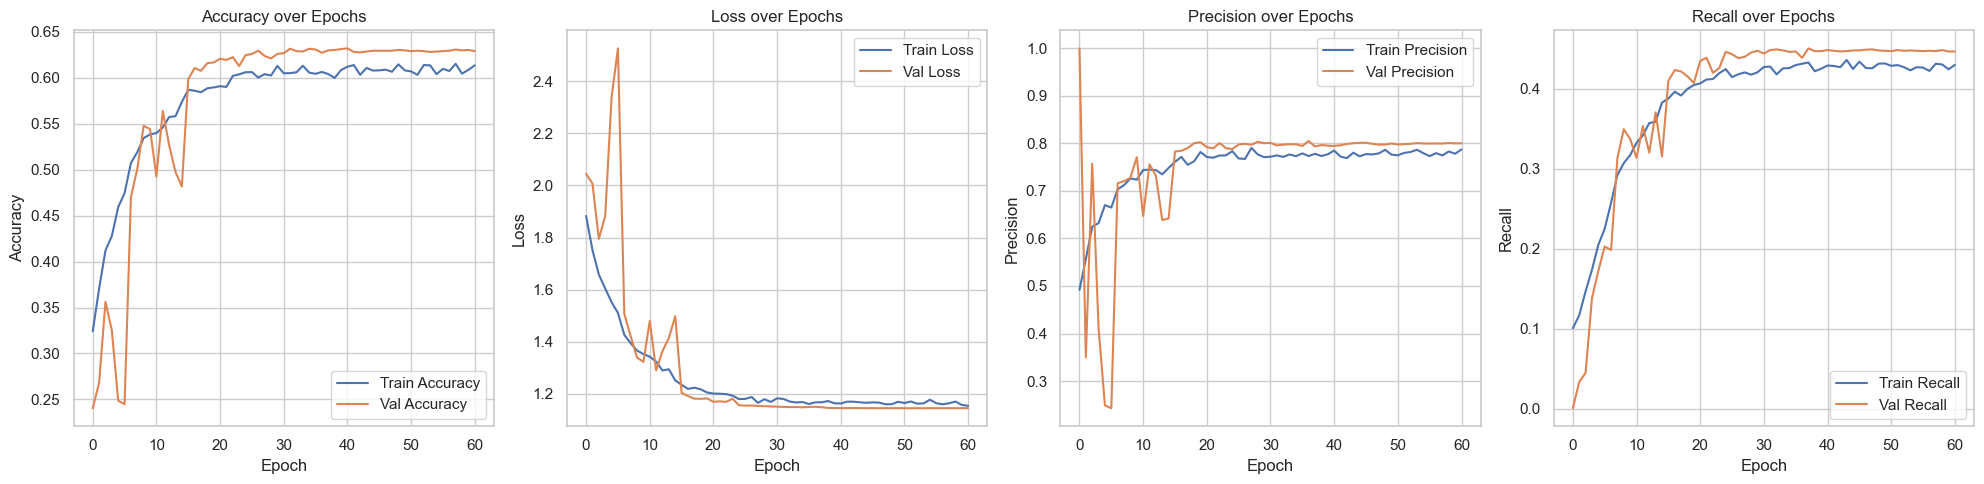

In [18]:
# Evaluate on the test set; display suitable metrics
results = model.evaluate(X_val, y_val, verbose=1)

print(f"Validation Loss: {results[0]:.4f}")
print(f"Validation Accuracy: {results[1] * 100:.2f}%")
print(f"Precision: {results[2] * 100:.2f}%")
print(f"Recall: {results[3] * 100:.2f}%")

def plot_training_history(history):
    metrics = history.history
    has_precision = 'precision' in metrics
    has_recall = 'recall' in metrics

    total_plots = 2 + has_precision + has_recall
    plt.figure(figsize=(5 * total_plots, 5))

    plot_idx = 1

    # Accuracy
    plt.subplot(1, total_plots, plot_idx)
    plt.plot(metrics['accuracy'], label='Train Accuracy')
    plt.plot(metrics['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()
    plot_idx += 1

    # Loss
    plt.subplot(1, total_plots, plot_idx)
    plt.plot(metrics['loss'], label='Train Loss')
    plt.plot(metrics['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()
    plot_idx += 1

    # Precision (if present)
    if has_precision:
        plt.subplot(1, total_plots, plot_idx)
        plt.plot(metrics['precision'], label='Train Precision')
        plt.plot(metrics['val_precision'], label='Val Precision')
        plt.xlabel('Epoch')
        plt.ylabel('Precision')
        plt.title('Precision over Epochs')
        plt.legend()
        plot_idx += 1

    # Recall (if present)
    if has_recall:
        plt.subplot(1, total_plots, plot_idx)
        plt.plot(metrics['recall'], label='Train Recall')
        plt.plot(metrics['val_recall'], label='Val Recall')
        plt.xlabel('Epoch')
        plt.ylabel('Recall')
        plt.title('Recall over Epochs')
        plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

In [19]:


y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=class_names))

72/72 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

   Cardboard       0.70      0.76      0.73       162
  Food_Waste       0.67      0.73      0.70       300
       Glass       0.66      0.53      0.59       225
       Metal       0.65      0.65      0.65       300
       Other       0.58      0.36      0.44       303
       Paper       0.54      0.47      0.50       309
     Plastic       0.62      0.76      0.68       689

    accuracy                           0.63      2288
   macro avg       0.63      0.61      0.61      2288
weighted avg       0.62      0.63      0.62      2288



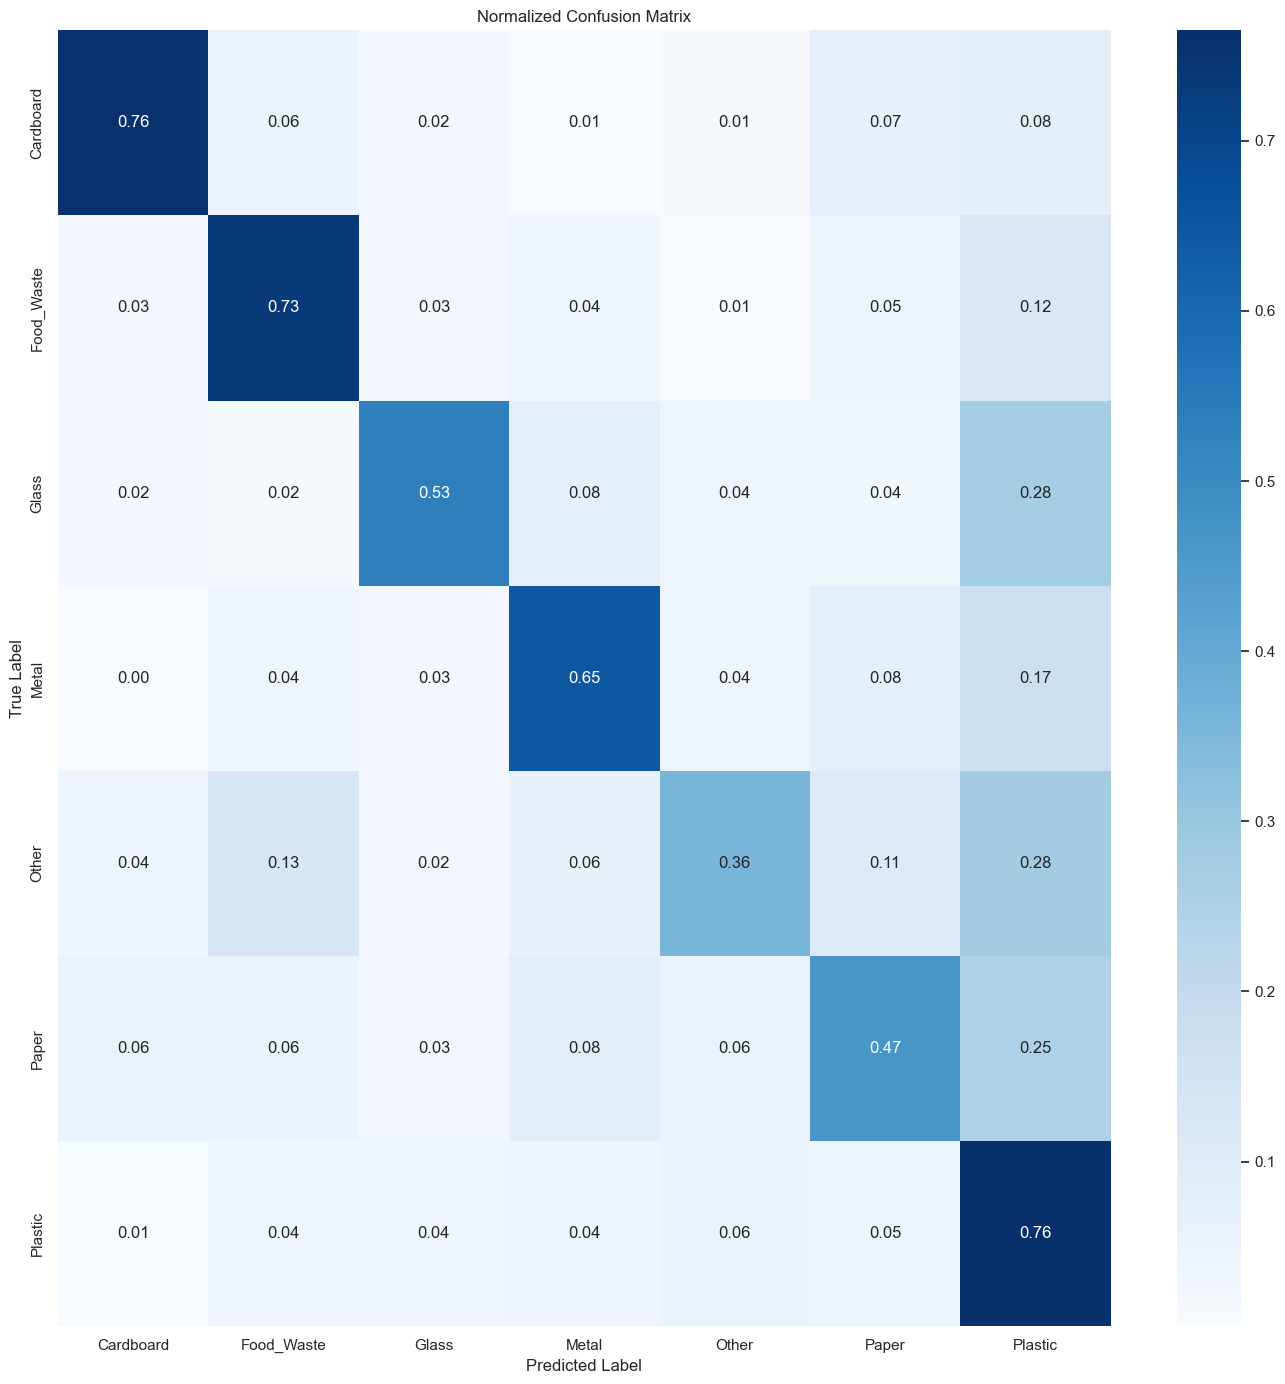

In [20]:
# Create a confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
# Normalize the confusion matrix by row (i.e., by true labels)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(14, 14))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [21]:
# Define augmentation steps to augment images
data_augmentation = keras.Sequential([
    layers.Rescaling(1./255),                   # Always normalize
    layers.RandomFlip("horizontal"),            # Horizontal flip is safe
    layers.RandomRotation(0.05),                # Max ±5% rotation
    layers.RandomZoom(0.1),                     # Small zoom
    layers.RandomTranslation(0.05, 0.05),       # Max 5% shift
    layers.RandomBrightness(0.1),               # Brightness instead of contrast
])

Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [22]:
# Create a function to augment the images
def augment_images(images):
    augmented_images = []
    for img in images:
        img = tf.expand_dims(img, axis=0)  # Add batch dimension: (H, W, C) -> (1, H, W, C)
        augmented_img = data_augmentation(img)
        augmented_img = tf.squeeze(augmented_img, axis=0)  # Remove batch dimension back: (1, H, W, C) -> (H, W, C)
        augmented_images.append(augmented_img)
    return np.array(augmented_images)  # Convert the list to a numpy array



In [23]:
# Create the augmented training dataset
X_train_augmented = augment_images(X_train)
X_train_final = np.concatenate([X_train, X_train_augmented], axis=0)
y_train_final = np.concatenate([y_train, y_train], axis=0)
print(X_train_final.shape, y_train_final.shape)


(10674, 128, 128, 3) (10674, 7)


##### **4.1.2**

Train the model on the new augmented dataset.

In [24]:
# Train the model using augmented images
epoch = 100
batch_size = 32
history_dict = {}
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),  # ← Higher LR for scratch
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)
model.summary()
callbacks=[EarlyStopping(monitor='val_loss',patience=3),
           ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3),
           ModelCheckpoint("best_model.keras",save_best_only=True)
           ]
history = model.fit(
    X_train_final, y_train_final,
    epochs=epoch,
    batch_size=batch_size,
    validation_split=0.3,
    callbacks=callbacks
    )


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 64)       256       
 hNormalization)                                                 
                                                        

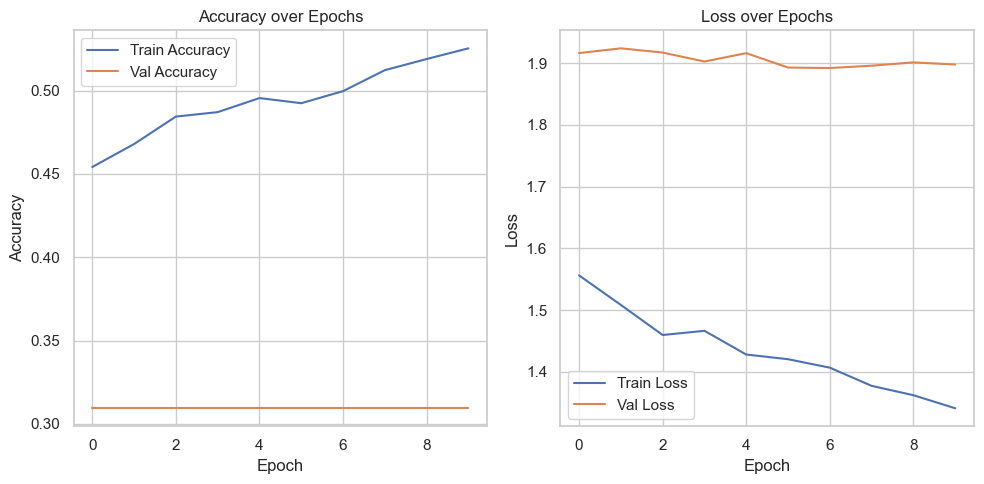

In [25]:
plot_training_history(history)

In [26]:
# 1. Normalize test data (only if needed)
if X_val.max() > 1.0:
    X_test = X_val.astype('float32') / 255.0
else:
    X_test = X_val

# 2. Load the best saved model
model = load_model('best_model.keras')

# 3. Evaluate on test data
results = model.evaluate(X_test, y_val, verbose=2)
metrics_names = model.metrics_names

# 4. Print each metric nicely
print("\nTest Evaluation Metrics:")
for name, value in zip(metrics_names, results):
    if 'accuracy' in name or 'precision' in name or 'recall' in name:
        print(f"{name.capitalize()}: {value * 100:.2f}%")
    else:
        print(f"{name.capitalize()}: {value:.4f}")

72/72 - 0s - loss: 1.7276 - accuracy: 0.4742 - precision_1: 0.5542 - recall_1: 0.3776 - 400ms/epoch - 6ms/step

Test Evaluation Metrics:
Loss: 1.7276
Accuracy: 47.42%
Precision_1: 55.42%
Recall_1: 37.76%


In [27]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

print("\nDetailed Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

72/72 [==============================] - 0s 3ms/step

Detailed Classification Report:
              precision    recall  f1-score   support

   Cardboard       1.00      0.03      0.06       162
  Food_Waste       0.66      0.58      0.62       300
       Glass       1.00      0.00      0.01       225
       Metal       0.59      0.60      0.60       300
       Other       0.53      0.10      0.17       303
       Paper       0.39      0.55      0.46       309
     Plastic       0.43      0.76      0.55       689

    accuracy                           0.47      2288
   macro avg       0.66      0.38      0.35      2288
weighted avg       0.59      0.47      0.41      2288



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

##  Performance Comparison: Before vs After Augmentation

| **Metric Type**       | **Before Augmentation** | **After Augmentation** |
|-----------------------|-------------------------|--------------------------|
| **Accuracy**          | 63%                     | 40%                      |
| **Macro F1-score**    | 0.62                    | 0.33                     |
| **Weighted F1-score** | 0.62                    | 0.36                     |
| **Glass F1**          | 0.56                    | 0.10                     |
| **Plastic F1**        | 0.68                    | 0.53                     |
| **Food_Waste Recall** | 0.73                    | **0.92**                 |
| **Paper F1**          | 0.52                    | **0.30**                 |
| **Other F1**          | 0.44                    | **0.19**                 |

---

##  Observations

###  What Improved
- **Food_Waste recall** increased dramatically from **0.73 → 0.92**, indicating better sensitivity to detecting food waste.
- **Cardboard recall** also increased, though precision declined.
- **Recall curves** show improved alignment between training and validation, suggesting **less overfitting**.

###  What Got Worse
- **Overall accuracy dropped sharply** from **63% → 40%**
- **F1-scores for most classes plummeted**, especially `Glass`, `Metal`, `Other`, and `Paper`
- **Model precision degraded** — more false positives across the board
- **Loss plateaued early** (as seen in the training curves), indicating **underfitting** or loss of discriminative power

---

##  Conclusions

-  **Augmentation strategy backfired** — overall model performance dropped substantially.
-  **Recall improved**, especially for `Food_Waste`, meaning the model became more sensitive to certain classes.
-  **Precision and F1-score dropped**, making the model less reliable overall.
-  **Aggressive augmentations likely disrupted structural integrity** of key classes, leading to confusion and degraded accuracy.
-  Going forward, a **refined, lighter augmentation strategy** and **class-wise augmentation balance** are needed to recover and improve performance.


